In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import  cm
import os

## Let's load just the GDP data for the Americas 

### First set the path to the data directory for the gapminder data relative to your 

In [14]:
path_to_data = '../data/'

In [15]:
#read in the csv to pands
americas_df = pd.read_csv(os.path.join(path_to_data, 'gapminder_gdp_americas.csv'), index_col=1).drop('continent', axis=1)
americas_df.columns = americas_df.columns.str.strip('gdpPercap_')


## Splitting out the top and bottom 10 countries by average GDP over time. 

In [16]:
top_10 = americas_df.T.mean().sort_values(ascending=False)[0:10].index #find the top ten countries
am_t10_df = americas_df.loc[top_10] #create a new df with just those countries 

In [17]:
bottom_10 = americas_df.T.mean().sort_values(ascending=True)[0:10].index #find the bottom ten countries
am_b10_df = americas_df.loc[bottom_10] #create a new df with just those countries 

## A simple line plot 

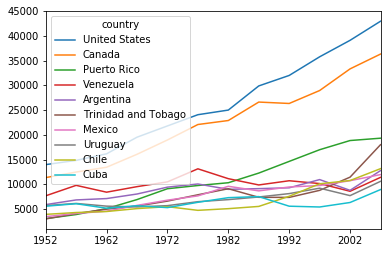

In [18]:

am_t10_df.T.plot(kind='line')


## Making a slightly more interesting plot with subplots

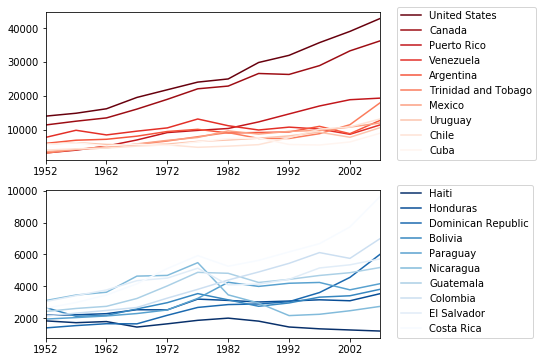

In [19]:
fig, axs = plt.subplots(2)
fig.set_size_inches (6,6)
am_t10_df.T.plot(kind='line', ax = axs[0], cmap='Reds_r' )
axs[0].legend(loc=[1.05,0])
am_b10_df.T.plot(kind='line', ax = axs[1], cmap='Blues_r' )
axs[1].legend(loc=[1.05,0])


## Making a bar plot! Note: the code is largely the same

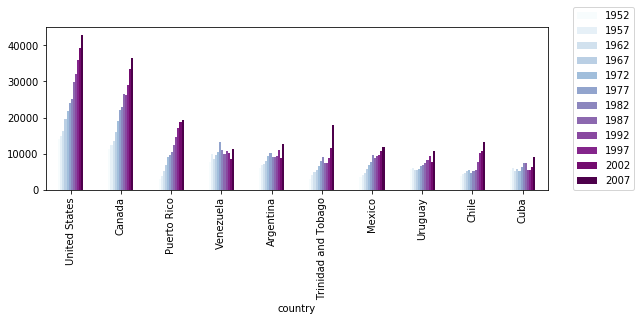

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches (9,3)
am_t10_df.plot(kind='bar', ax = ax, cmap='BuPu' )
ax.legend(loc=[1.05,0])

# All the gap minder data! 

## Read in the csv file containing all the data 

In [21]:
all_data = pd.read_csv(os.path.join(path_to_data,'gapminder_all.csv'), index_col=['continent','country'])
all_data.head()


gdpPercap_1952  gdpPercap_1957  gdpPercap_1962  \
continent country                                                        
Africa    Algeria          2449.008185     3013.976023     2550.816880   
          Angola           3520.610273     3827.940465     4269.276742   
          Benin            1062.752200      959.601080      949.499064   
          Botswana          851.241141      918.232535      983.653976   
          Burkina Faso      543.255241      617.183465      722.512021   

                        gdpPercap_1967  gdpPercap_1972  gdpPercap_1977  \
continent country                                                        
Africa    Algeria          3246.991771     4182.663766     4910.416756   
          Angola           5522.776375     5473.288005     3008.647355   
          Benin            1035.831411     1085.796879     1029.161251   
          Botswana         1214.709294     2263.611114     3214.857818   
          Burkina Faso      794.826560      854.735976      743.387037   

                        gdpPercap_1982  gdpPercap_1987  gdpPercap_1992  \
continent country                                                        
Africa    Algeria          5745.160213     5681.358539     5023.216647   
          Angola           2756.953672     2430.208311     2627.845685   
          Benin            1277.897616     1225.856010     1191.207681   
          Botswana         4551.142150     6205.883850     7954.111645   
          Burkina Faso      807.198586      912.063142      931.752773   

                        gdpPercap_1997  ...    pop_1962    pop_1967  \
continent country                       ...                           
Africa    Algeria          4797.295051  ...  11000948.0  12760499.0   
          Angola           2277.140884  ...   4826015.0   5247469.0   
          Benin            1232.975292  ...   2151895.0   2427334.0   
          Botswana         8647.142313  ...    512764.0    553541.0   
          Burkina Faso      946.294962  ...   4919632.0   5127935.0   

                          pop_1972    pop_1977    pop_1982    pop_1987  \
continent country                                                        
Africa    Algeria       14760787.0  17152804.0  20033753.0  23254956.0   
          Angola         5894858.0   6162675.0   7016384.0   7874230.0   
          Benin          2761407.0   3168267.0   3641603.0   4243788.0   
          Botswana        619351.0    781472.0    970347.0   1151184.0   
          Burkina Faso   5433886.0   5889574.0   6634596.0   7586551.0   

                          pop_1992    pop_1997  pop_2002  pop_2007  
continent country                                                   
Africa    Algeria       26298373.0  29072015.0  31287142  33333216  
          Angola         8735988.0   9875024.0  10866106  12420476  
          Benin          4981671.0   6066080.0   7026113   8078314  
          Botswana       1342614.0   1536536.0   1630347   1639131  
          Burkina Faso   8878303.0  10352843.0  12251209  14326203  

[5 rows x 36 columns]

### Column names make it a bit challenging. Here is a peice of code that splits the column headers and creates a multi-indexed data frame

In [22]:
all_data_split = all_data.copy()
metric = all_data.columns.str.split('_').str[0]
years = all_data.columns.str.split('_').str[1].astype(int)

all_data_split.columns = pd.MultiIndex.from_arrays([metric, years])
all_data_split=all_data_split.reset_index().set_index('country')

## Create a plot of Life expectancy vs GDP; colored by continent and sized by total population

At the top of the cell I define some variables (`year`, `scale`, `colormap`). Try changing these variables to modify the plot! 

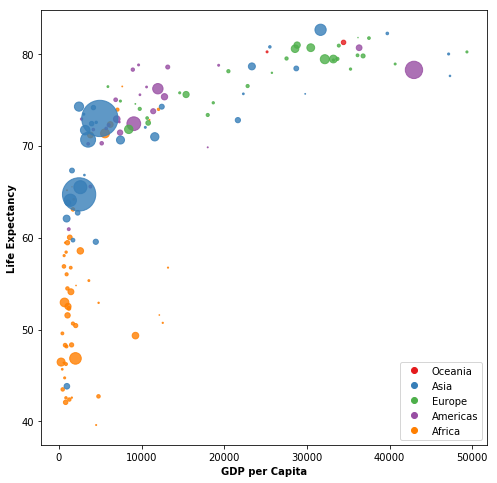

In [23]:
year = 2007 #choose from {1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007}
scale = 10**6 #scale the circle size
colormap = cm.Set1 #change this; use tab to check out some options


fig, ax = plt.subplots() #initalize a figure
fig.set_size_inches(8,8)
cdict ={} #define the colormap
continents = set(all_data_split['continent'])
for cont, color in zip(continents, colormap.colors[0:len(continents)]):
    cdict[cont]=color

ax.scatter(x=all_data_split['gdpPercap',year], y=all_data_split['lifeExp',year], 
           c=all_data_split['continent'].apply(lambda x: cdict[x]), s=all_data_split['pop',year]/scale, alpha=0.8);
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in cdict.values()];
plt.legend(markers, cdict.keys(), numpoints=1);
ax.set_xlabel('GDP per Capita', weight='bold');
ax.set_ylabel('Life Expectancy', weight = 'bold');